# CS 5480: Deep Learning - Homework 1 Coding Problems

**Name:** Aaron Dubale

**Student ID:** 12592130

**Due Date:** February 17, 2026 at 11.59 PM

---

## Instructions

- Complete all TODOs in the code cells below
- Add markdown cells with your analysis and interpretations where requested
- Include all plots with proper labels, legends, and titles
- Show all output (don't delete print statements)
- Submit this completed notebook (.ipynb file)

---

# Problem 5: Bias-Variance Through Experimentation (30 points)

## Objective

Empirically observe the bias-variance tradeoff by fitting polynomials of different degrees to noisy data. You will see firsthand how model complexity affects both training and generalization performance.

## Setup

Generate data from the function: $y = \sin(2\pi x) + \epsilon$ where $\epsilon \sim N(0, 0.3^2)$

## Part (a): Data Generation and Visualization (5 points)

Generate training and test datasets, then visualize them.

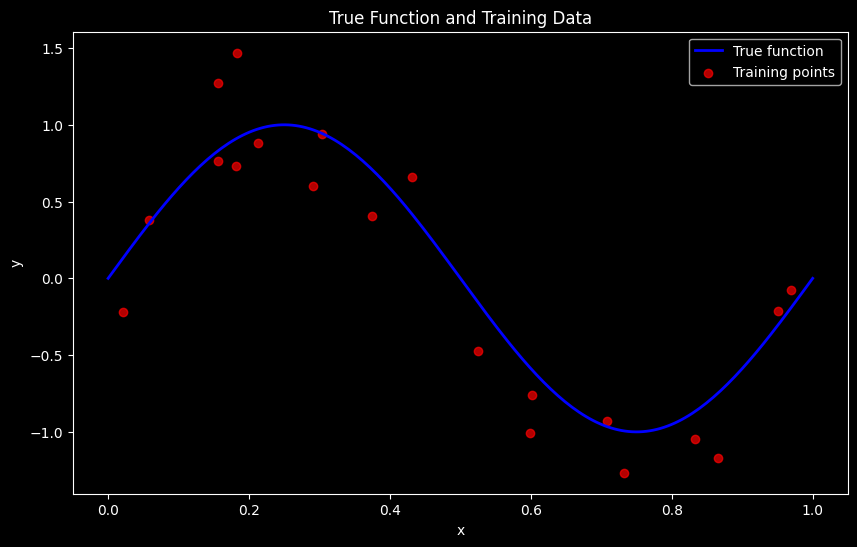

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# True function
def true_function(x):
    return np.sin(2 * np.pi * x)

# Generate training data (small sample)
n_train = 20
X_train = np.random.uniform(0, 1, n_train)
y_train = true_function(X_train) + np.random.normal(0, 0.3, n_train)

# Generate test data (larger, for evaluation)
n_test = 100
X_test = np.random.uniform(0, 1, n_test)
y_test = true_function(X_test) + np.random.normal(0, 0.3, n_test)

# TODO: Create a plot showing:
# 1. The true function (smooth curve from 0 to 1)
# 2. Training points (scatter plot)
# Label axes, add legend, and title

x_plot = np.linspace(0, 1, 200)

plt.figure(figsize=(10, 6))

# TODO: Plot the true function
# plt.plot(x_plot, true_function(x_plot), ...)
plt.plot(x_plot, true_function(x_plot), color="blue", linewidth=2, label="True function")

# TODO: Plot training data points
# plt.scatter(X_train, y_train, ...)v
plt.scatter(X_train,y_train, color="red", alpha=0.7, label="Training points")

# TODO: Add labels, legend, title
plt.xlabel("x")
plt.ylabel("y")
plt.title("True Function and Training Data")
plt.legend()

plt.show()

## Part (b): Fit Polynomials of Different Degrees (7 points)

Fit polynomial models of degrees $d \in \{1, 3, 5, 9, 15\}$ to the training data.

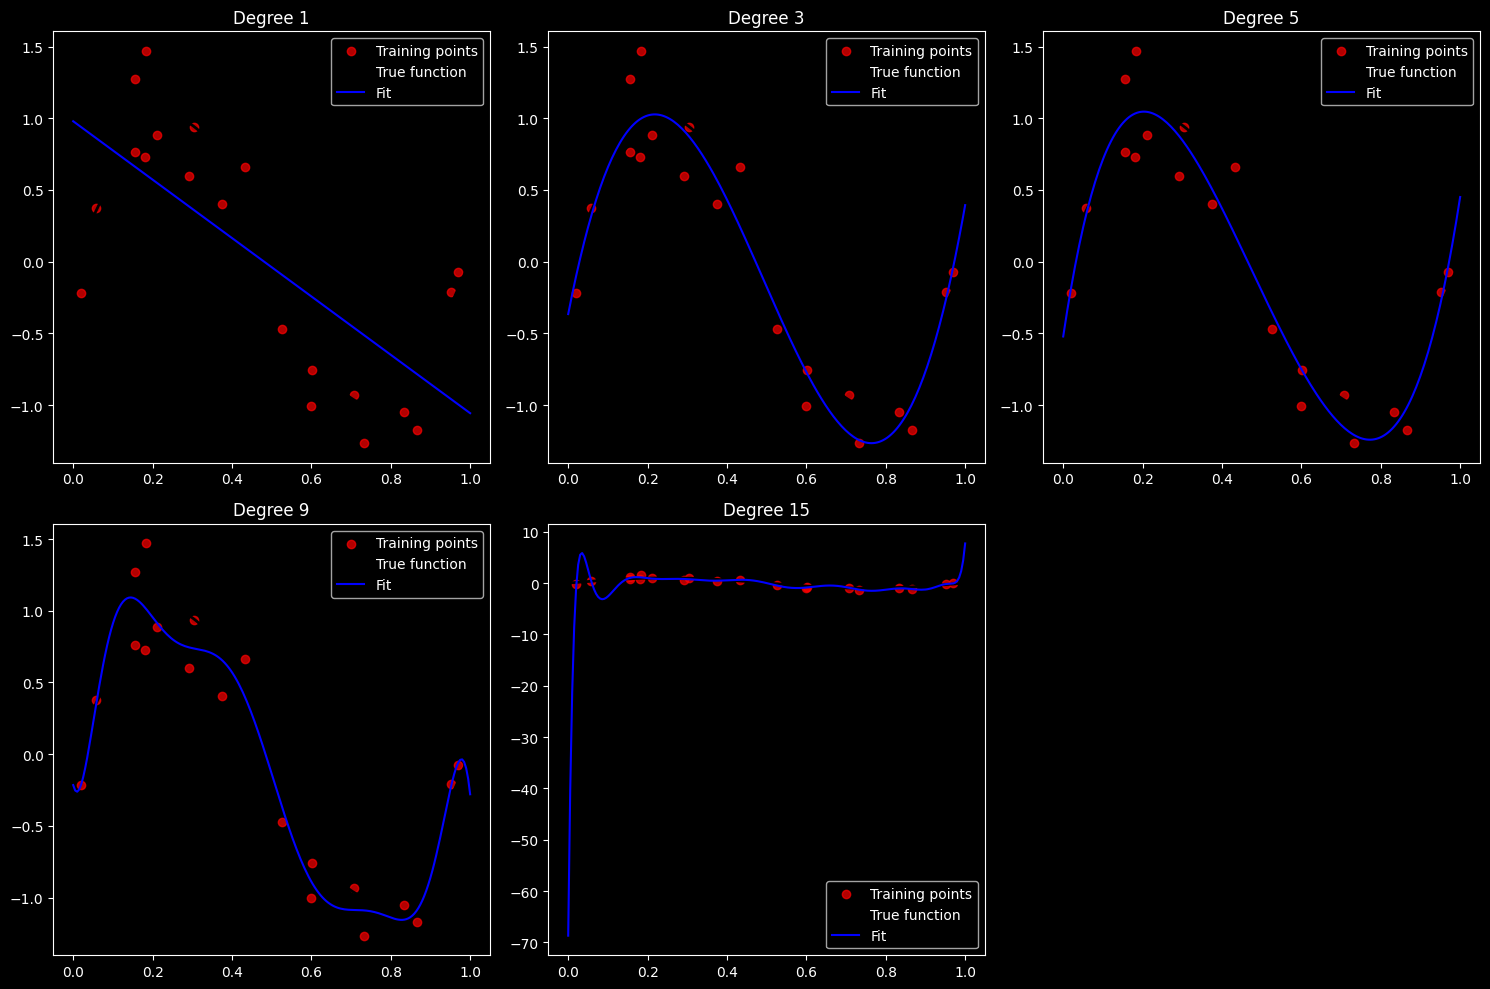

In [18]:
import numpy
import matplotlib.pyplot as plt
# Fit polynomials of different degrees
degrees = [1, 3, 5, 9, 15]
models = {}

for d in degrees:
    coeffs = np.polyfit(X_train, y_train, d)
    models[d] = coeffs

# TODO: Create a figure with subplots (or one large plot)
# For each degree, plot:
# 1. Training data (scatter)
# 2. True function (smooth curve)
# 3. Fitted polynomial (smooth curve, use np.polyval)

x_plot = np.linspace(0, 1, 200)

# Option 1: Subplots (recommended for clarity)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, d in enumerate(degrees):
    ax = axes[i]

    ax.scatter(X_train, y_train, color="red", alpha=0.7, label="Training points")
    ax.plot(x_plot, true_function(x_plot), color="black", linewidth=2, label="True function")
    y_pred = np.polyval(models[d], x_plot)
    ax.plot(x_plot, y_pred, color="blue", label="Fit")
    ax.set_title(f"Degree {d}")
    ax.legend()

# Remove the extra subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# TODO: You should observe:
# - Low degrees: smooth but miss the pattern (underfitting)
# - Medium degrees: capture the pattern reasonably
# - High degrees: wild oscillations between points (overfitting)

## Part (c): Compute Training and Test Errors (6 points)

For each polynomial degree, compute the Mean Squared Error on both training and test sets.

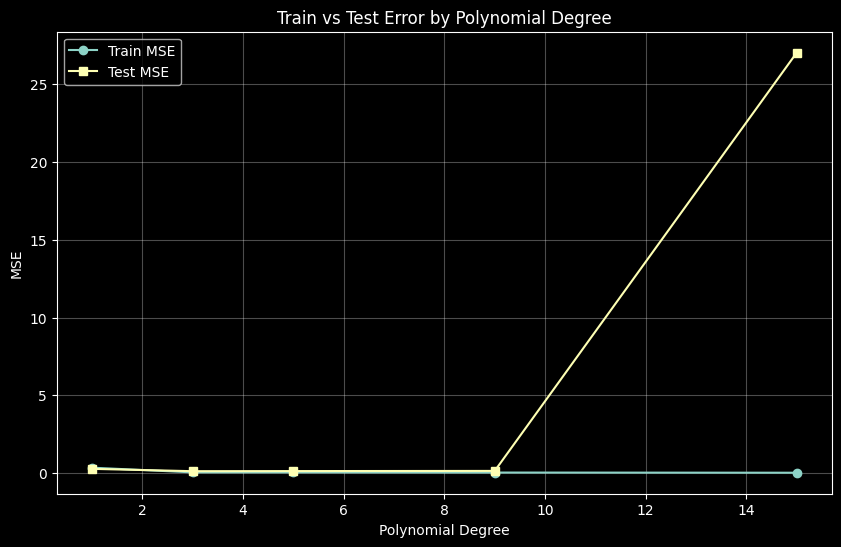

In [19]:
def compute_mse(X, y_true, coeffs):
    """Compute mean squared error for polynomial model"""
    y_pred = np.polyval(coeffs, X)
    mse = np.mean((y_pred - y_true) ** 2)
    return mse

train_errors = {}
test_errors = {}

for d in degrees:
    # TODO: Compute train and test MSE for each degree
    train_mse = compute_mse(X_train, y_train, models[d])
    test_mse = compute_mse(X_test, y_test, models[d])

    train_errors[d] = train_mse
    test_errors[d] = test_mse

# TODO: Create a plot with degree on x-axis and MSE on y-axis
# Plot both train error and test error on the same plot
# Use different colors/markers for train vs test

plt.figure(figsize=(10, 6))

# TODO: Plot training and test errors
plt.plot(degrees, [train_errors[d] for d in degrees], marker="o", label="Train MSE")
plt.plot(degrees, [test_errors[d] for d in degrees], marker="s", label="Test MSE")

# TODO: Add labels, legend, title, grid
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Train vs Test Error by Polynomial Degree")
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

# TODO: You should observe:
# - Training error decreases monotonically
# - Test error: decreases initially, then increases (U-shaped curve)

## Part (d): Multiple Runs to Measure Variance (7 points)

Repeat the entire experiment 50 times with different random training sets to measure how sensitive each model is to the specific training data.

C:\Users\clanm\AppData\Local\Temp\ipykernel_17292\2583284262.py:15: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train_run, y_train_run, d)
C:\Users\clanm\AppData\Local\Temp\ipykernel_17292\2583284262.py:15: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train_run, y_train_run, d)


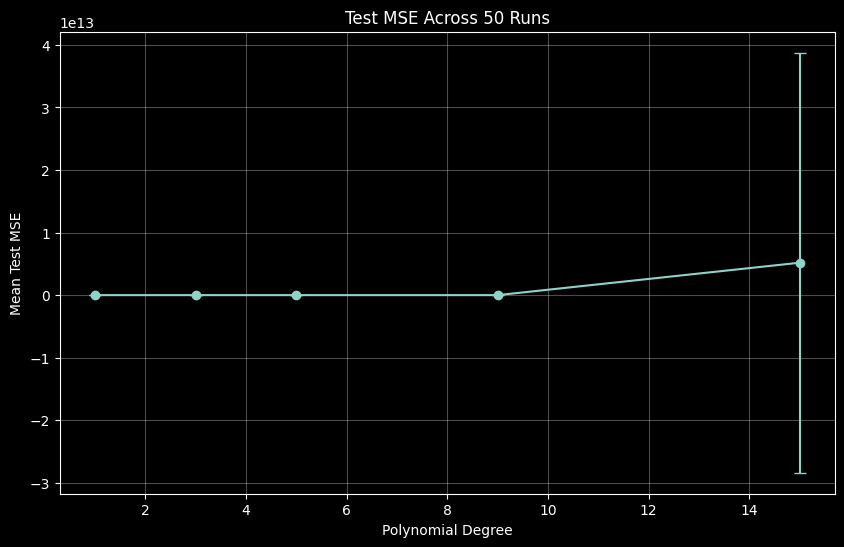

In [20]:
n_runs = 50
test_mse_runs = {d: [] for d in degrees}

# Use a fixed test set for all runs (for fair comparison)
np.random.seed(123)
X_test_fixed = np.random.uniform(0, 1, 100)
y_test_fixed = true_function(X_test_fixed) + np.random.normal(0, 0.3, 100)

for run in range(n_runs):
    # Generate new training data with different random seed
    X_train_run = np.random.uniform(0, 1, n_train)
    y_train_run = true_function(X_train_run) + np.random.normal(0, 0.3, n_train)

    for d in degrees:
        coeffs = np.polyfit(X_train_run, y_train_run, d)

        y_pred_test = np.polyval(coeffs, X_test_fixed)
        test_mse = np.mean((y_test_fixed - y_pred_test) ** 2)

        test_mse_runs[d].append(test_mse)

mean_test_mse = {d: np.mean(test_mse_runs[d]) for d in degrees}
std_test_mse = {d: np.std(test_mse_runs[d]) for d in degrees}

plt.figure(figsize=(10, 6))

plt.errorbar(
    degrees,
    [mean_test_mse[d] for d in degrees],
    yerr=[std_test_mse[d] for d in degrees],
    fmt="o-",
    capsize=4
)

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Test MSE")
plt.title("Test MSE Across 50 Runs")
plt.grid(True, alpha=0.3)

plt.show()

# Print results (this part can stay or be commented out if you want them to write it)
# print("\nMean Test MSE across 50 runs:")
# for d in degrees:
#     print(f"Degree {d:2d}: {mean_test_mse[d]:.4f} +/- {std_test_mse[d]:.4f}")

## Part (e): Analysis and Interpretation (5 points)

Answer the following questions based on your experiments.

### (i) Which degree has the lowest training error on average? Does this surprise you?

**Your answer:**

### (ii) Which degree has the lowest test error on average? Is it the same as part (i)?

**Your answer:**

### (iii) Describe the bias-variance tradeoff you observe

**Low-degree polynomials (e.g., degree 1):**

**High-degree polynomials (e.g., degree 15):**

**Best tradeoff (which degree?):**

### (iv) The variance across runs tells us how sensitive the model is to the specific training data. Which models have the highest variance? Why does this make sense?

**Your answer:**

### (v) If you had to choose a model for deployment (where you can't see the test set), how would you make the decision? What does this tell you about the importance of validation sets?

**Your answer:**